In [1]:
from LibLv1 import *
is_gpu_available()

TensorFlow version: 2.10.0
GPU disponibles: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]
GPU 0 est activé avec gestion dynamique de la mémoire.


True

In [ ]:
data_dir = r'dataset_binary'
image_h = 224
image_w = 224
batch_s = 32
image_size = (image_h, image_w)  
save_model_path = r"models/Custom_binary_best_weights.h5"


Found 19986 files belonging to 2 classes.
Using 15989 files for training.
Found 19986 files belonging to 2 classes.
Using 3997 files for validation.
Classes détectées : ['No_photos', 'Photo']


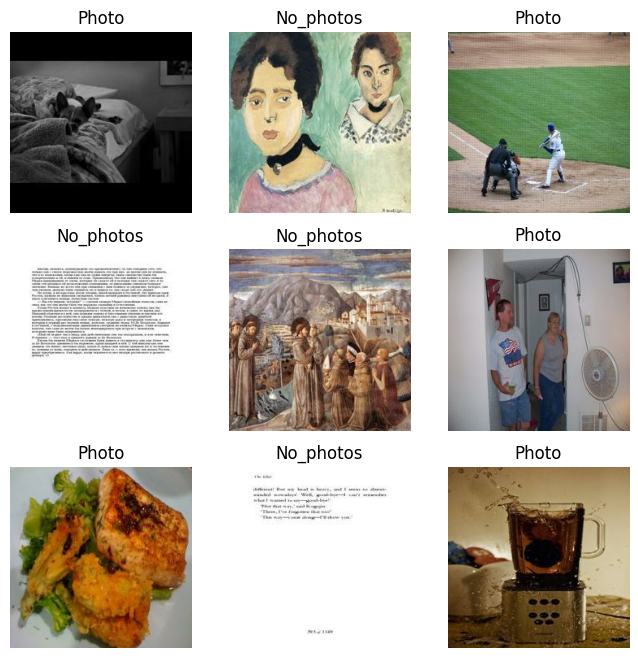

In [3]:
preprocess_images(data_dir)
# Jeu d'entraînement (80% des données)
train_set, test_set = prepare_data(data_dir)
class_names = test_set.class_names
print("Classes détectées :", class_names)

plt.figure(figsize=(8, 8))
for images, labels in train_set.take(1):  
    for i in range(9): 
        ax = plt.subplot(3, 3, i + 1) 
        plt.imshow(images[i].numpy().astype("uint8"))  
        plt.title(class_names[labels[i].numpy()])  
        plt.axis("off") 
plt.show()

Verifier les classes :

In [ ]:
model = Create_Sequential((image_h , image_w  , 3 ) , len(class_names)  , ShowSummary=True, dropOut=0.3)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip (RandomFlip)    (None, 224, 224, 3)       0         
                                                                 
 random_rotation (RandomRota  (None, 224, 224, 3)      0         
 tion)                                                           
                                                                 
 random_zoom (RandomZoom)    (None, 224, 224, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 32)     128       
 ormalization)                                          

In [ ]:
with tf.device('/GPU:1'):
    history = TrainModel(
    model=model,
    train_set=train_set,
    test_set=test_set,
    nbEpochs=100,
    UseEarlyStopping=True , 
    modelCheckpoint=save_model_path
    )

Epoch 1/100
500/500 [==============================] - ETA: 0s - loss: 0.4261 - accuracy: 0.8183
Epoch 1: val_loss improved from inf to 0.36359, saving model to models\Custom_Bin_best_weights.h5
500/500 [==============================] - 420s 829ms/step - loss: 0.4261 - accuracy: 0.8183 - val_loss: 0.3636 - val_accuracy: 0.8321
Epoch 2/100
500/500 [==============================] - ETA: 0s - loss: 0.3437 - accuracy: 0.8482
Epoch 2: val_loss improved from 0.36359 to 0.33002, saving model to models\Custom_Bin_best_weights.h5
500/500 [==============================] - 222s 444ms/step - loss: 0.3437 - accuracy: 0.8482 - val_loss: 0.3300 - val_accuracy: 0.8692
Epoch 3/100
335/500 [===================>..........] - ETA: 1:16 - loss: 0.3181 - accuracy: 0.8644

In [ ]:
displayHistoryData(history.history['accuracy'] , history.history['val_accuracy'] , history.history['loss'], history.history['val_loss'] , len(history.history['accuracy'])) 

1/1 [==============================] - 0s 26ms/step
Vérification des lignes (%): [100. 100. 100. 100. 100.]


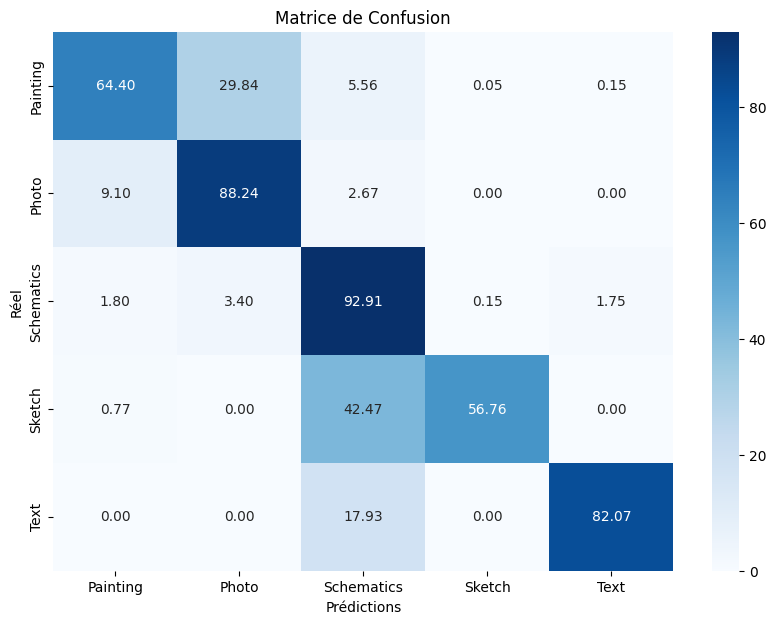

In [ ]:
plot_confusion_matrix(model ,test_set , class_names)

259/259 [==============================] - 8s 28ms/step - loss: 0.5210 - accuracy: 0.8122
Évaluation sur le jeu de test - Accuracy: 0.81, Loss: 0.5210
1/1 [==============================] - 0s 111ms/step
Classe prédite: Photo avec une confiance de 0.69


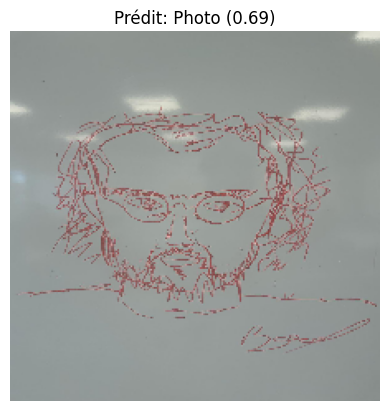

259/259 [==============================] - 7s 28ms/step - loss: 0.5210 - accuracy: 0.8122
Évaluation sur le jeu de test - Accuracy: 0.81, Loss: 0.5210
1/1 [==============================] - 0s 19ms/step
Classe prédite: Schematics avec une confiance de 1.00


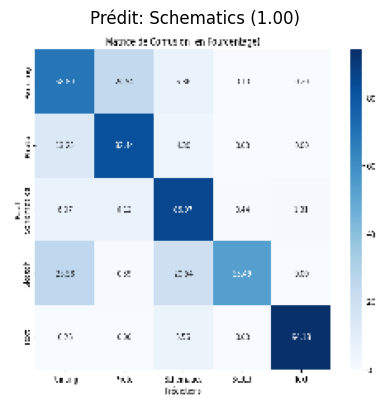

259/259 [==============================] - 7s 26ms/step - loss: 0.5210 - accuracy: 0.8122
Évaluation sur le jeu de test - Accuracy: 0.81, Loss: 0.5210
1/1 [==============================] - 0s 22ms/step
Classe prédite: Schematics avec une confiance de 1.00


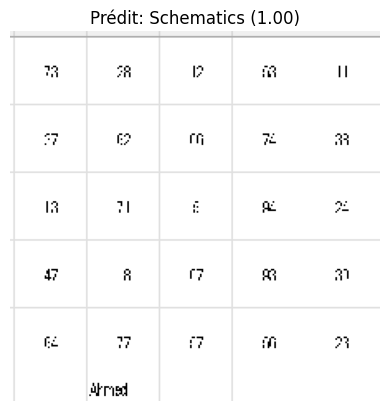

259/259 [==============================] - 7s 26ms/step - loss: 0.5210 - accuracy: 0.8122
Évaluation sur le jeu de test - Accuracy: 0.81, Loss: 0.5210
1/1 [==============================] - 0s 19ms/step
Classe prédite: Schematics avec une confiance de 1.00


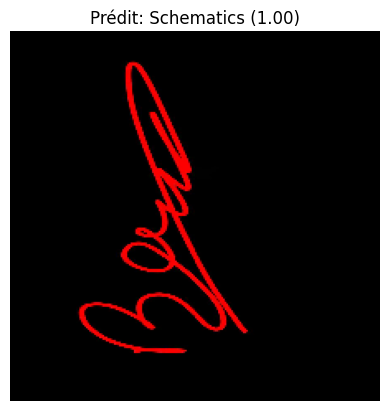

259/259 [==============================] - 7s 26ms/step - loss: 0.5210 - accuracy: 0.8122
Évaluation sur le jeu de test - Accuracy: 0.81, Loss: 0.5210
1/1 [==============================] - 0s 20ms/step
Classe prédite: Photo avec une confiance de 0.68


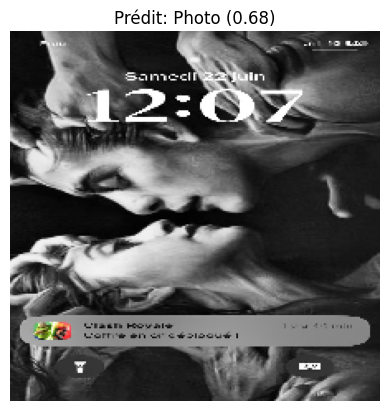

In [ ]:
with tf.device('/GPU:1'):
    test_model(model, test_set, "lorenzo.jpg", class_names  , image_size )
    test_model(model, test_set, "result/output.png", class_names , image_size)
    test_model(model, test_set, "image.png", class_names , image_size)
    test_model(model, test_set, "result/WhatsApp Image 2025-04-08 à 10.02.35_b655e5ba.jpg", class_names , image_size)
    test_model(model, test_set, "result/WhatsApp Image 2025-04-08 à 10.02.35_e55ae64f.jpg", class_names , image_size)